# Functions library
This library helps building time dependent functions which serve to simulate dynamc processes. So far, this functions are used in compartimental models for simulating the following processes: 
* Mobility change due to lockdowns
* Mobility change due to holidays or social events 
* Examination dynamics 
* Susceptible dynamics: migration, social clusters permeation

In this jupyter notebook we will show how to use the different tools present in this library


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from pathlib import Path
sys.path.insert(1, '../src/SEIR/')
sys.path.insert(1, '../src/utils/')
import functions

# Events Creator
This function allows to create a function specifying its values for different time intervals.  
**Arguments:** 
* **values:** List with the values for the different intervals. It accepts ints or floats
* **days:** List of pairs (lists) of values that represent the different intervals associated with the given values. len(days) = len(values)
* **functions:** Additional functions that can be added to the resulting events function.

For values not present in the interval the default value is 0.
Overlaping values will be added. 

**Example:**
The following example will create  a function with the following values and intervals:
* $F_0 = 1$ when $t \in [0,10]$
* $F_1 = 10$ when $t \in [11,15]$
* $F_2 = 15$ when $t \in [14,20]$
* $F_3 = 3$ when $t \in [19,25]$


In [2]:
values = [3,0.55,5,0.2]
#values = [0,5,3,2]
days = [[0,10],[11,15],[14,20],[19,25]]

In [3]:
ex1 = functions.Events(values,days)

In [4]:
ex1(10)

1.5000249688277862

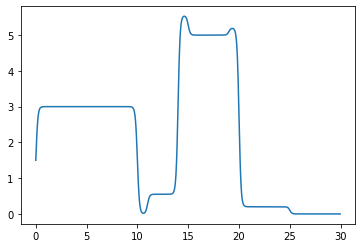

In [5]:
t = np.array(np.arange(0,30,0.05))
explot = [ex1(i) for i in t]
plt.plot(t,explot)
plt.show()

# Periodic Functions

## General Construction:
square(min_val=0,max_val=1,period=14,init=0,end=1000,off_val=0,initphase='min',duty=0.5)

## Square



In [6]:
square = functions.square(min_val=0,max_val=10,period=10,init=0,end=50,off_val=5,initphase='max',duty=0.5)

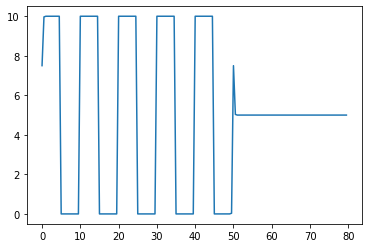

In [7]:
t = np.arange(0,80,0.5)
sq = [square(i) for i in list(t)]
plt.plot(t,sq)
plt.show()

# Function Addition

In [ ]:

def functionAddition(functarray):
    """
    Creates the function that results adding the functions present in the function array
    Receives a list where each element is a function that receives 1 argument
    """
    def f(t):
        aux = 0
        for i in functarray:    
            aux += i(t)
        return aux
    return f